In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr

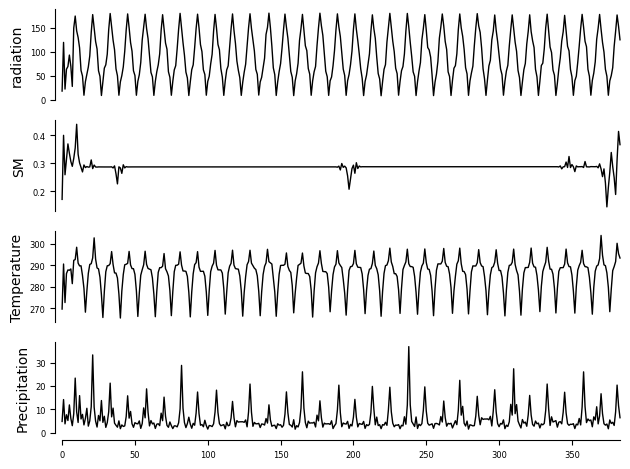

In [5]:
var_names = ['radiation', 'SM', 'Temperature', 'Precipitation']
df0 = pp.DataFrame(np.loadtxt('../../first_dataset_tests/240228/results/mean_series/0.txt'), var_names= var_names)
tp.plot_timeseries(df0); plt.show()

In [12]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.DataFrame(np.loadtxt('../../first_dataset_tests/240228/results/mean_series/0.txt'))

start_date = pd.Timestamp('1980-01-01')
end_date = pd.Timestamp('2012-01-01')
index = pd.date_range(start=start_date, end=end_date, freq='M')
df.index = index

In [17]:
# Perform seasonal decomposition
decomposition0 = seasonal_decompose(df.iloc[:,0], period=12) 

# Subtract the seasonal component from the original data
data_seasonal_adjusted0 = df.iloc[:,0] - decomposition0.seasonal

df0 = np.array(data_seasonal_adjusted0)

# df0 = pp.DataFrame(df, var_names= var_names)
# tp.plot_timeseries(df0); plt.show()

In [18]:
decomposition2 = seasonal_decompose(df.iloc[:,2], period=12) 

# Subtract the seasonal component from the original data
data_seasonal_adjusted2 = df.iloc[:,2] - decomposition2.seasonal

df2 = np.array(data_seasonal_adjusted2)

decomposition3 = seasonal_decompose(df.iloc[:,3], period=12) 

# Subtract the seasonal component from the original data
data_seasonal_adjusted3 = df.iloc[:,3] - decomposition3.seasonal

df3 = np.array(data_seasonal_adjusted3)

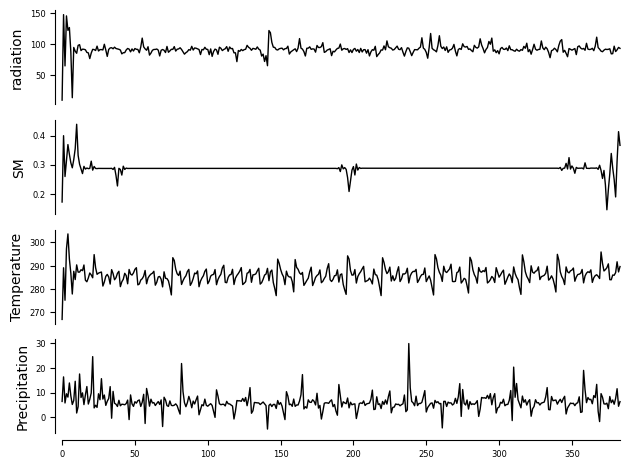

In [21]:
np.array(df.iloc[:,1])

adjusted_df = np.column_stack((df0, np.array(df.iloc[:,1]), df2, df3))
adj_df = pp.DataFrame(adjusted_df, var_names= var_names)
tp.plot_timeseries(adj_df); plt.show()

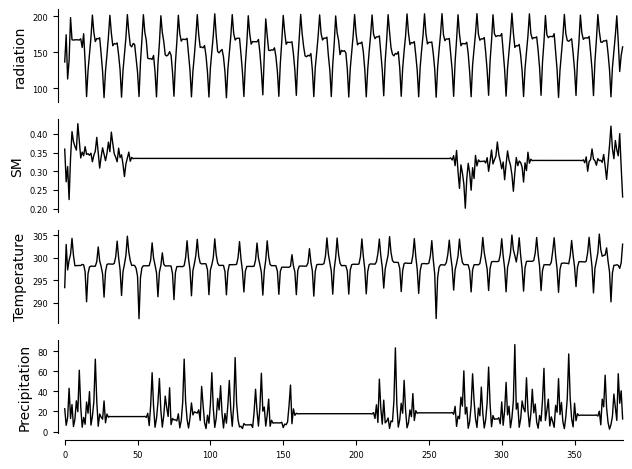

In [7]:
df1 = pp.DataFrame(np.loadtxt('../../first_dataset_tests/240228/results/mean_series/1.txt'), var_names= var_names)  
tp.plot_timeseries(df1); plt.show()

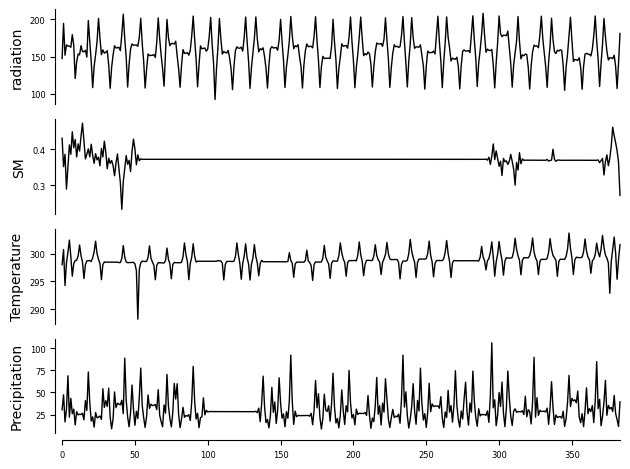

In [17]:
df2 = pp.DataFrame(np.loadtxt('./tfm/first_dataset_tests/240228/results/mean_series/2.txt'), var_names= var_names)
tp.plot_timeseries(df2); plt.show()

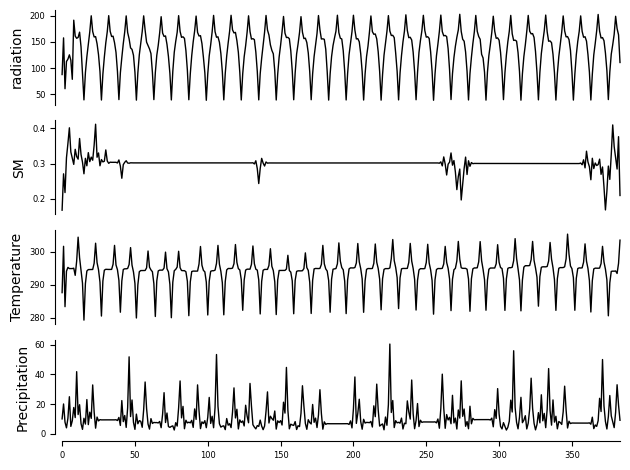

In [18]:
df3 = pp.DataFrame(np.loadtxt('./tfm/first_dataset_tests/240228/results/mean_series/3.txt'), var_names= var_names)
tp.plot_timeseries(df3); plt.show()

In [28]:
import time

start_time = time.time()
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=adj_df, 
    cond_ind_test=parcorr,
    verbosity=1)

results = pcmci.run_pcmci(tau_max=4, pc_alpha=None)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 4
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable radiation has 8 link(s):
    [pc_alpha = 0.5]
        (radiation -1): max_pval = 0.00034, |min_val| =  0.185
        (Temperature -2): max_pval = 0.06174, |min_val| =  0.097
        (Precipitation -2): max_pval = 0.09681, |min_val| =  0.086
        (radiation -4): max_pval = 0.13658, |min_val| =  0.078
        (Temperature -1): max_pval = 0.18503, |min_val| =  0.069
        (Precipitation -1): max_pval = 0.19297, |min_val| =  0.067
        (SM -4): max_pval = 0.30197, |min_val| =  0.053
        (SM -2): max_pval = 0.41570, |min_val| =  0.042

    Variable SM has 8 link(s):
    [pc_alpha = 0.4]
        (SM -1): max_pval = 0.00000, |min_val| =  0.523
        (radiation -3): max_pval = 0.00172, |min_val| =  0.162
        

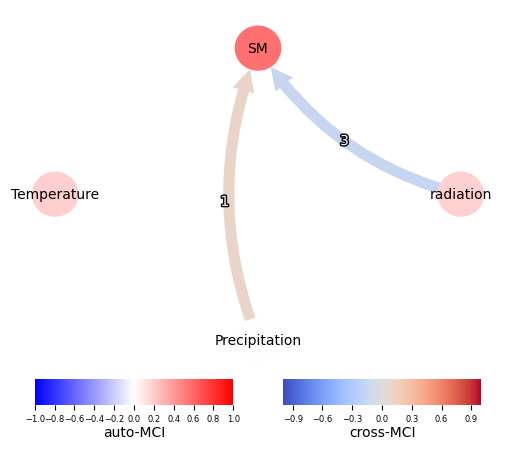

In [29]:
graph = pcmci.get_graph_from_pmatrix(p_matrix=results['p_matrix'], alpha_level=0.05, tau_min=0, tau_max=4)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=graph,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    edge_ticks=0.3,
    cmap_edges='coolwarm',
    node_ticks=.2,
    cmap_nodes='bwr',
    ); 
plt.show()

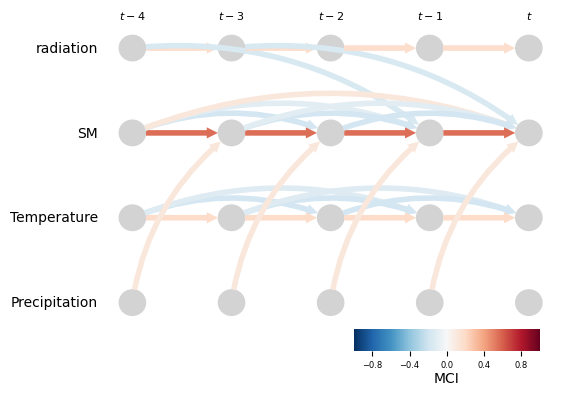

In [30]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    graph=graph,
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 4
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable radiation has 10 link(s):
    [pc_alpha = 0.5]
        (radiation -1): max_pval = 0.00000, |min_val| =  0.602
        (radiation -4): max_pval = 0.00000, |min_val| =  0.408
        (Temperature -4): max_pval = 0.00000, |min_val| =  0.278
        (Precipitation -4): max_pval = 0.10035, |min_val| =  0.085
        (Precipitation -3): max_pval = 0.12863, |min_val| =  0.079
        (Temperature -3): max_pval = 0.14420, |min_val| =  0.075
        (radiation -2): max_pval = 0.26242, |min_val| =  0.058
        (Precipitation -2): max_pval = 0.27717, |min_val| =  0.056
        (Temperature -1): max_pval = 0.34778, |min_val| =  0.049
        (Precipitation -1): max_pval = 0.43339, |min_val| =  0.041

    Variable SM has 5 link(s

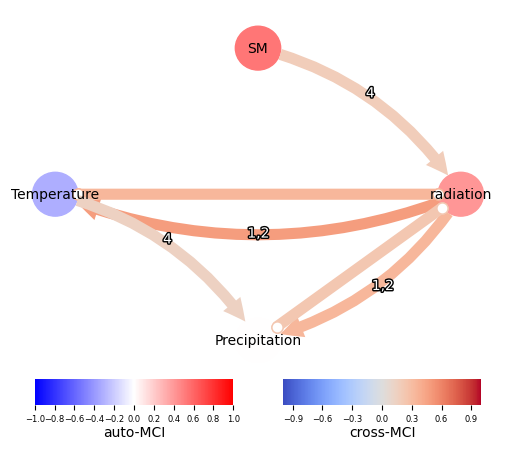

In [29]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=df0, 
    cond_ind_test=parcorr,
    verbosity=1)

results = pcmci.run_pcmci(tau_max=4, pc_alpha=None)

graph = pcmci.get_graph_from_pmatrix(p_matrix=results['p_matrix'], alpha_level=0.01, tau_min=0, tau_max=4)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=graph,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    edge_ticks=0.3,
    cmap_edges='coolwarm',
    node_ticks=.2,
    cmap_nodes='bwr',
    ); 
plt.show()

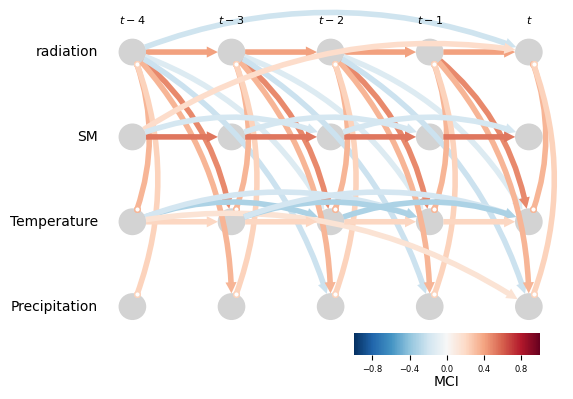

In [30]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    graph=graph,
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


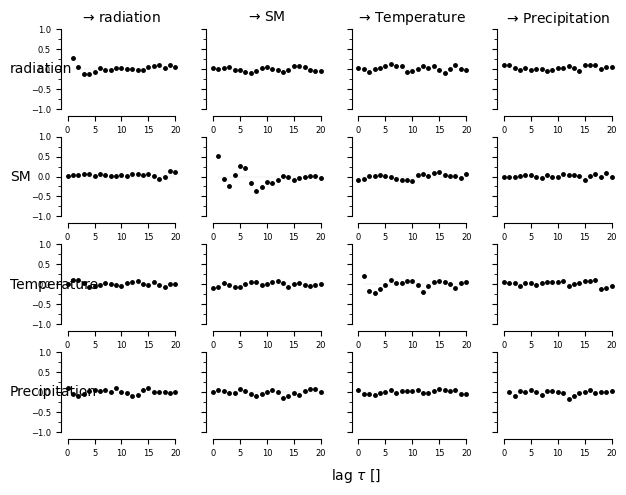

In [31]:
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()